Mean Squared Error on training data: 2625932483.691595
First few predictions on test data: [119523.73916299 142059.63049676 204907.54769651 202201.95322816
 191462.45377638]


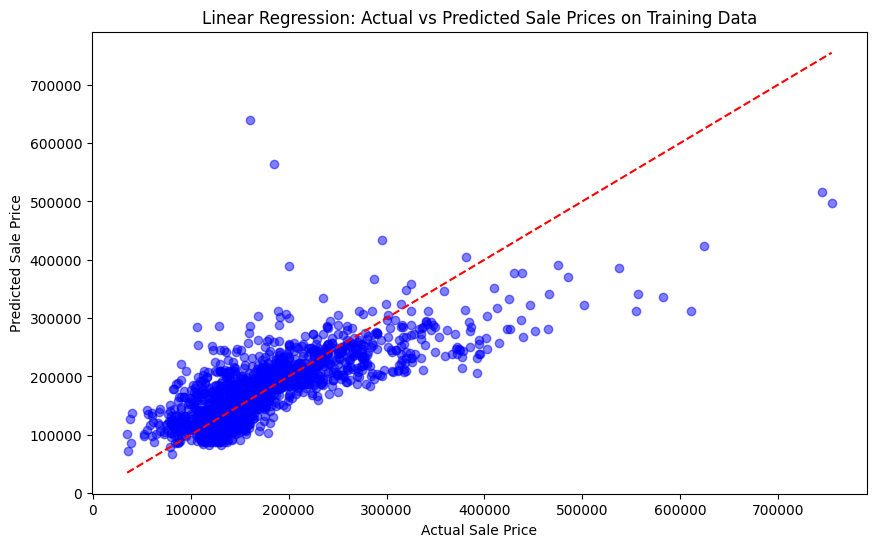

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the train and test datasets
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Selecting relevant features and the target variable for the training data
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

# Filtering the data to include only the relevant columns and dropping rows with any missing values
train_data_filtered = train_data[features + [target]].dropna()
test_data_filtered = test_data[features].dropna()

# Separating features and target variable
X_train = train_data_filtered[features]
y_train = train_data_filtered[target]

# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the training data
y_train_pred = model.predict(X_train)

# Calculating the Mean Squared Error on training data
train_mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on training data:", train_mse)

# Making predictions on the test data
test_predictions = model.predict(test_data_filtered)
print("First few predictions on test data:", test_predictions[:5])

# Plotting the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Linear Regression: Actual vs Predicted Sale Prices on Training Data")
plt.show()
